# K-Means Clustering

Deskripsi     : Script berikut ini adalah script yang digunakan untuk melakukan K-Means Clustering

Dataset       : Dataset Dummy yang terdiri dari dua variabel, yaitu variabel gaji dan pengeluaran

Referensi     : Buku Fundamental with Python (by Teguh Wahyono)

Curated by    : B. Ari Kuncoro (IYKRA)

## Latar Belakang

Sebuah perusahaan melakukan penelitian terhadap data-data konsumen yang dimilikinya. Perusahaan tersebut akan melakukan pengelompokan data ke dalam beberapa cluster berdasarkan kriteria besaran gaji yang diterima dan pengeluaran per bulannya. 


## Bagaimana cara melakukan clustering?

Langkah pertama yang mesti kita lakukan adalah dengan memanggil library atau pustaka yang dibutuhkan, yaitu matplotlib, numpy, pandas, dan sklearn. 

In [1]:
# Step 1. Memanggil Library yang dibutuhkan 

%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans

Langkah kedua adalah memanggil Dataset 

In [2]:
# Step 2. Memanggil dataset 
dataset = pd.read_csv('dataset/gaji_pengeluaran.csv')
dataset.keys()

Index(['gaji', 'pengeluaran'], dtype='object')

In [3]:
# Menampilkan 5 baris data pertama 
dataset.head() #untuk menampilkan 5 baris data pertama 

,gaji,pengeluaran
0,2500,1750
1,3800,4200
2,3900,3800
3,4350,5500
4,4400,3200


Langkah ketiga adalah dengan melakukan konversi dataset ke data array 

In [4]:
# Step 3. Konversi Dataset ke Data Array 
X = np.asarray(dataset)

Langkah keempat adalah menampilkan Data Array ke dalam Scatter plot 

Text(0.5,1,'Grafik Konsumen')

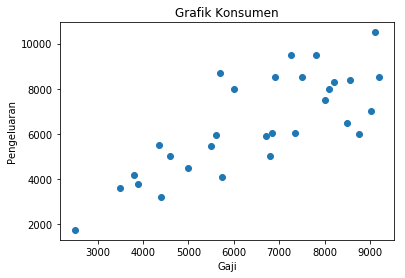

In [5]:
## Step 4. Menampilkan data ke dalam grafik scatterplot 
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik Konsumen")

Langkah kelima adalah melakukan algoritma K-Means dengan jumlah K yang ditentukan dengan scree plot

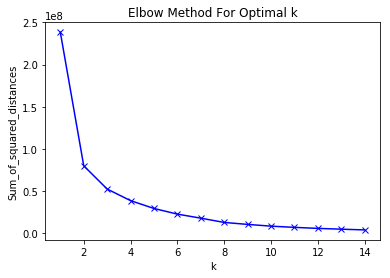

In [6]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:
# Step 5. Melakukan aktivasi algoritma K-Means 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Langkah keenam adalah menampilkan nilai centroid dan label data point 

In [17]:
# Step 6. Menampilkan nilai centroid yang dibangkitkan oleh algoritma kmeans 
print(kmeans.cluster_centers_)

[[7793.84615385 8530.76923077]
 [4200.         3961.11111111]
 [7006.25       5862.5       ]]


In [18]:
print(kmeans.labels_)

[1 1 1 1 1 2 2 1 2 0 0 2 0 0 0 2 0 2 0 0 0 1 2 1 0 2 0 0 0 1]


Langkah ketujuh adalah visualisasi hasil clustering

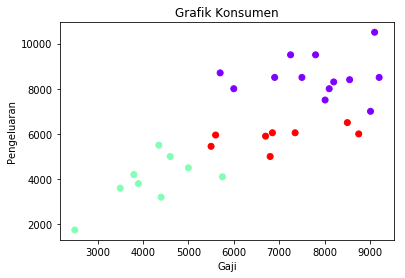

In [19]:
# Step 7 Visualisasi Hasil 
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik Konsumen")
plt.show()

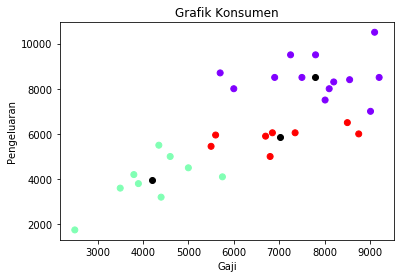

In [20]:
# Step 8 Menampilkan hasil centroid 
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik Konsumen")
plt.show()

In [21]:
# Memasukkan hasil label ke dalam suatu 
data_clustered = pd.DataFrame(X)
data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered = data_clustered.sort_values('cluster')
data_clustered = np.asarray(data_clustered)

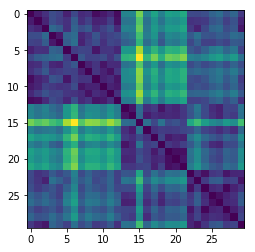

In [22]:
# Membuat similarity Matrix 
from scipy.spatial.distance import cdist
dist = cdist(data_clustered[:,0:2],data_clustered[:,0:2], metric='euclidean')
plt.imshow(dist)
plt.show()

In [14]:
# Menghitung Dunn's index 
# Mengingat tidak ada function Dunn's Index dalam sklearn, kita gunakan alternatif lain yaitu DB Index. 
# Silakan baca referensi berikut

Referensi: https://www.geeksforgeeks.org/dunn-index-and-db-index-cluster-validity-indices-set-1/ 

In [15]:
# Namun ketika dicoba, package sklearn mesti dinaikkan versinya menjadi versi 0.21.2
# Alternatif lain, kita bisa melakukan pembuatan function seperti pada referensi berikut ini: 

Referensi: https://gist.github.com/douglasrizzo/cd7e792ff3a2dcaf27f6